# L'économétrie avec Python 

Cette formation vise à initier les etudiants et les chercheurs en economie à l'utilisation du logiciel Python.

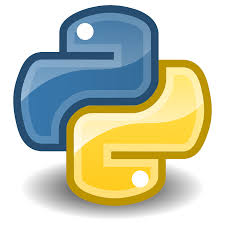

## Objectifs
    
- 1) Comprendre ce qu'est la programmation et son utilité en économie.


- 2) Assister à une démonstration sur l'emploi de Python pour l'analyse économique

- 3) Introduction aux principes de bases de la programmation.

- 4) Travaux pratique: Telechargement et utlisation de phython pour l'analyse économétrique.

### Qu'est-ce que la programmation ?

La programmation c'est simplement le langage qui sert à donner des ordres aux machines (ordinateur) pour atteindre des objectifs précis. 

La programmation nous permet de créer des logiciels, des applications et des sites Web.  Votre navigateur Internet, votre système d'exploitation, les applications sur votre téléphone, Facebook sont tous faits grâce à la programmation.

Dans notre cas (l’économie), nous allons fournir à l'ordinateur des instructions sur les opérations statistiques pour l’extraction ou le traitement de cet data. 


#### Qu'est-ce que Python?

Python est un langage de programmation. Ainsi, python est un moyen pour nous de donner des ordres aux ordinateurs.

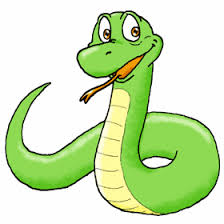

## Pourquoi utiliser Python pour l'econometrie?

Trois raisons principales !!! 
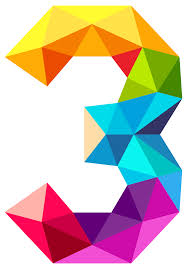


### Raison N1 : C'est gratuit. Python est un langage open-source qui est gratuit à télécharger. 

En revanche, les programmes tels que STATA ou SAS utilisés par beaucoup d’économistes coûtent des centaines de dollars.

### Raison N2 : C'est plus rapide que les autres logiciels de traitement de data. 

Python a été créée par des une équipe de chercheurs qui se sont assurés de sa grande efficacité. 


### Raison N3 :  Python a plus de capacités que les autres logiciels. 

Parce que python est un langage de programmation général, python peut accéder et visualiser des données de manière plus intéressante et plus efficace.


# L’Utilisation de Python Pour l’économie 

Trois utilisations principales : Obtention, visualisation et analyse de la data. 

#### 1) Python pour obtenir de la data – Par Example : Data de la Banque Mondiale

#### 2) Python pour visualiser la data - [Portail de données ODI](https://odi-data-portal.herokuapp.com/Portal).

#### 3) Python pour analyser les données - Analyse de régression


## Obtenir de la data de la Banque mondiale

Python peut vous aidez à trouver de la data ! Dans cet exemple, nous utiliserons le package wbdata pour collecter des données à partir des indicateurs de développement de la Banque mondiale.

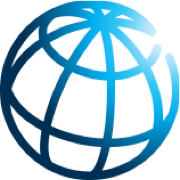

In [ ]:
import wbdata

In [ ]:
wbdata.get_source()

C’est beaucoup de data. On peut choisir de sélectionner quelques des indicateurs de développement africain. 

Le code ci-dessous fournit les noms et les codes de plusieurs indicateurs de développement. 

In [ ]:
wbdata.get_indicator(source=2)

#### Quels indicateurs voulons-nous?

J'ai trouvé une étude qui examine la relation entre le PIB par habitant, les versements d’argent de l’étranger et l'investissement privé. Je pensais que nous pourrions le recréer en utilisant les indicateurs de développement africains.

Premièrement il faut créer un dictionnaire de codes d'indicateurs et leurs noms respectifs.


In [ ]:

indicators_dict = {'NY.GDP.PCAP.PP.KD': 'PIB (Constant 2011 USD)', 
                  'BX.TRF.PWKR.DT.GD.ZS': 'Personal remittances, received (% of GDP)', 
                  'BX.KLT.DINV.WD.GD.ZS': 'Foreign direct investment, net inflows (% of GDP)', 
                  'GB.XPD.RSDV.GD.ZS' : 'Research and development expenditure (% of GDP)', 
                  'FS.AST.PRVT.GD.ZS' : 'Domestic credit to private sector (% of GDP)'}


### On va choisir les pays à revenu intermédiaire-inférieur

Nous voulons examiner les pays qui répondent à cette catégorie.
.

In [ ]:
LMC_countries = [i['id'] for i in wbdata.get_country(incomelevel='LMC', display=False)]

In [ ]:
print(LMC_countries)

### Obtenir la data

Maintenant que nous avons défini les indicateurs et les pays que nous voulons examiner, nous pouvons prendre les données. 

In [ ]:
df = wbdata.get_dataframe(indicators_dict, country=LMC_countries, convert_date=False)

In [ ]:
df.head()

### Maintenant, Il faut patienter un peu !

En fonction de la vitesse d’Internet, cela peut prendre un peu de temps. 

### Voilà la Data !!!
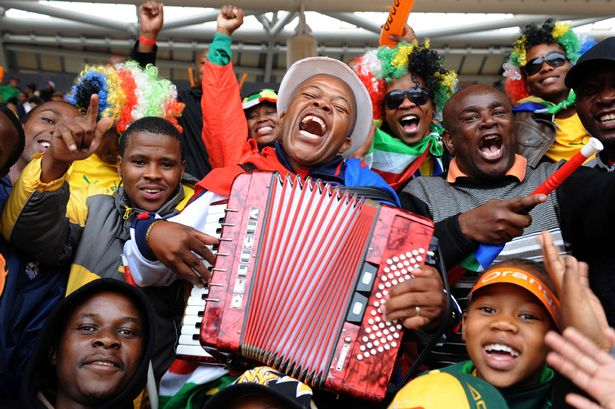

In [ ]:
df.describe()

### Rechercher les codes pays du pays d'intérêt

Dans certains cas, nous pouvons simplement vouloir avoir une variable pour un seul pays.

Par exemple le code pour la Côte d'Ivoire est CIV.

In [ ]:
wbdata.search_countries("ivoire")

Maintenant, regardons notre data 

On inclut les indicateurs et le pays de choix dans la fonction get dataframe ().


In [ ]:
df_CIV = wbdata.get_dataframe({'NY.GDP.PCAP.PP.KD': 'PIB par habitant (Constant 2011 USD)'}, country='CIV', convert_date=False)

In [ ]:
df_CIV

Voila ! Nous avons un ensemble de données avec le PIB par habitant de la Côte d'Ivoire de 1965 à 2016. 

## Visualisation des Graphes

[Portail de données ODI](https://odi-data-portal.herokuapp.com/Portal).
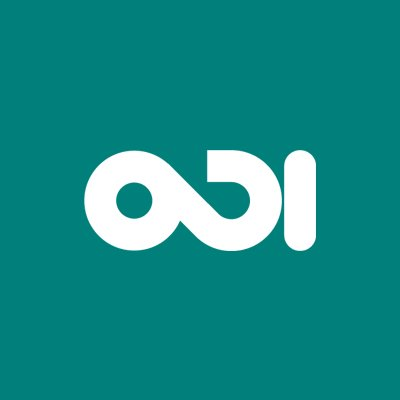

# Procéder à la Régression 

Nous avons déjà vu les bases de python, en particulier comment utilisés python pour accéder aux données et comment les visualiser. Maintenant, nous allons examiner comment effectuer une analyse économétrique avec Python.
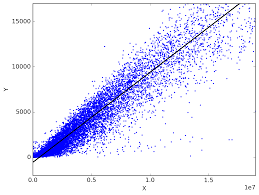

## Statsmodels

Nous allons travailler avec statsmodels.

Statsmodels est un package avec des fonctions spécifiques pour l'économétrie telles que la correction, la régression et l'analyse des séries chronologiques.

De plus, statsmodels génère un moyen pratique de publier des résultats de régression via Latex.


In [ ]:
# Import statsmodels comme sm
import statsmodels.api as sm 

#### Ajoutez une constante pour la regression 

In [ ]:
df['Constante'] = 1

#### Liste des variables indépendantes dans les régressions

In [ ]:
# Créer des listes de variables à utiliser dans la première régression
Xvars_1 = ['Domestic credit to private sector (% of GDP)', 'Constante']
# Créer des listes de variables à utiliser dans http://localhost:8889/notebooks/Les%20bases%20de%20l'%C3%A9conom%C3%A9trie%20avec%20Python.ipynb#Ex%C3%A9cuter-la-r%C3%A9gression-et-enregistrer-les-valeurs-ajust%C3%A9esla seconde régression
Xvars_2 = ['Domestic credit to private sector (% of GDP)', 'Foreign direct investment, net inflows (% of GDP)', 'Constante']
# Créer des listes de variables à utiliser dans la troisième régression
Xvars_3 = ['Domestic credit to private sector (% of GDP)', 'Foreign direct investment, net inflows (% of GDP)', 'Personal remittances, received (% of GDP)', 'Constante']

#### Exécuter la régression

### Exporter les résultats dans un format lisible

### Résultat de la table Latex

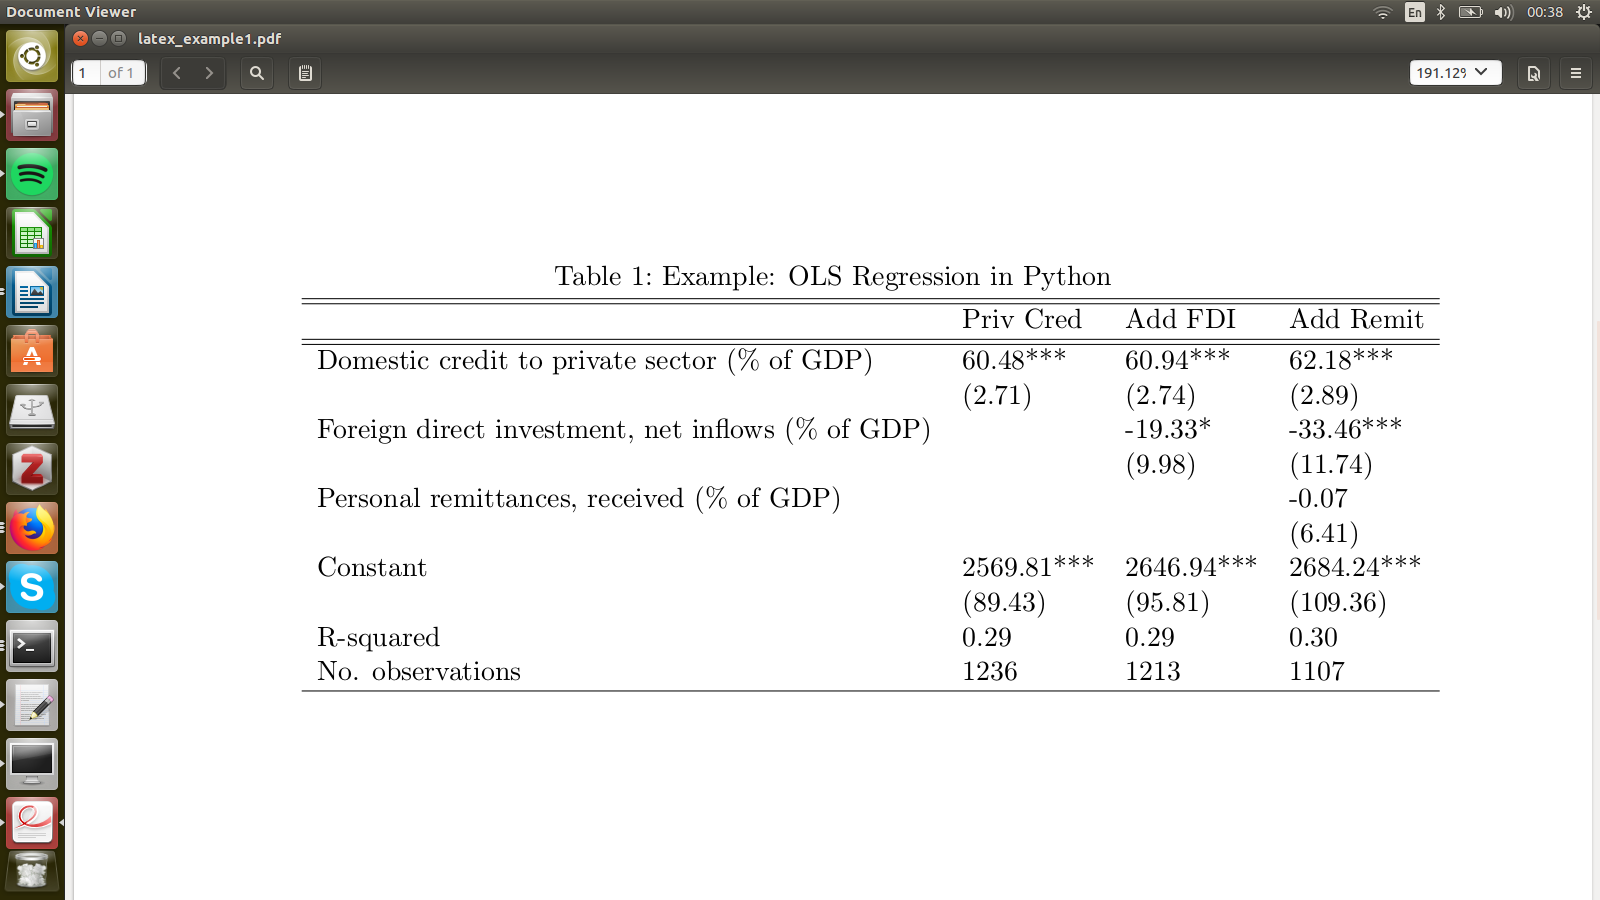

## Python peut faire beaucoup de choses. 

J'espère que cette présentation initiale vous a motivé à télécharger le paquet et apprendre à coder sur Python pour l'économétrie!


## Break 

Pause de 15 min

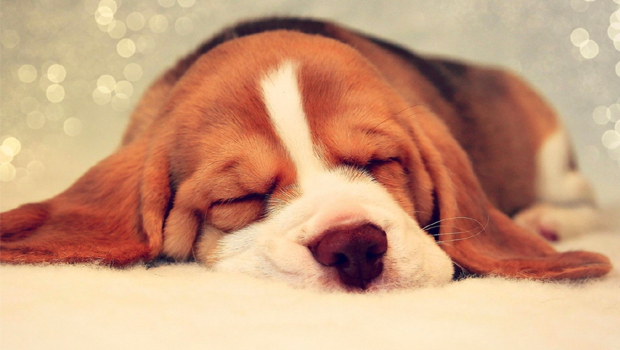

#### Comment télécharger Python ?

- Voici un lien pour télécharger Python - MiniConda - un programme d'installation qui télécharge correctement python. [Miniconda](hhttps://conda.io/miniconda.html). INSTALLEZ LE  !

https://conda.io/miniconda.html

- Avec MiniConda, un logiciel qui facilite l’utilisation de Python pour l’économétrie, il est nécessaire d'installer des ‘paques’ économétriques spécifiques à travers le terminal de votre ordinateur. Par exemple, pour installer statsmodels, nous insérons 'pip install statsmodels' dans la fenêtre du terminal. 

Nous explorerons cela plus en profondeur plus tard durant le cours.


#### Dois-je télécharger Python 2 ou Python 3 ?

- Il est préférable d'utiliser Python 3. C’est la version la plus récente. Nous utiliserons Python 3 dans ce cours.

### Après avoir téléchargé MiniConda, ouvrez l'invite Miniconda.

#### Exécutez le code suivant dans le Prompt MiniConda:

- conda install jupyter notebook
- pip install wbdata
- pip install holoviews 
- pip install statsmodels
- conda install pandas


# http://138.68.165.186:8001


# Le Jupyter Notebook 

#### C’est quoi 'Jupyter' ? 

- Jupyter est le cahier de python. Il vous permet de travailler sur python avec un affichage plus sympa. 

- Il permet de visualiser les données économiques. Notez que Jupyter n'utilise pas Internet. Même si il fonctionne via le navigateur (Firefox, Google, etc.), il n'a pas besoin d'accès à Internet pour fonctionner (sauf dans certains cas). Ainsi, Jupyter n'affectera pas votre facture d’internet !
  

## Leçon I: Les bases de Python

Cette leçon présente aux élèves les bases de Python. En particulier, nous passerons en revue les variables et les types de valeurs, les listes, les fonctions, les méthodes, les paquets et numpy.

## Variables

Les variables sont des noms spécifiques, sensibles à la casse, pour les valeurs.

Par exemple, je peux enregistrer ma hauteur en tant que variable.
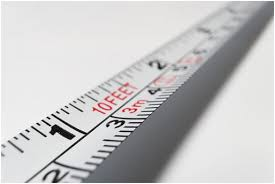

In [ ]:
# générant une variable de 1,87 mètres
AJL_hauteur_m = 1.87

AJL_poids_kg = 80 

Python enregistre ces valeurs dans la mémoire de l'ordinateur et nous nous référons au nom de la variable pour récupérer la valeur. Nous pouvons imprimer ces valeurs en utilisant la fonction print ().

In [ ]:
print(AJL_hauteur_m)

In [ ]:
print(AJL_poids_kg)

Il y a quelques règles concernant les noms de variables.

#### 1) Ils ne peuvent pas commencer avec un nombre ou inclure des symboles ('#',?, Etc)


In [ ]:
variables4 = 340 

In [ ]:
variable? = 'today'

#### 2) Ils sont sensibles à la casse.

In [ ]:
Var = 23 
var = 35
print(Var)
print(var)

## Les types

Il existe 4 types de valeurs python: float, integer, boolean et string. Il est important de se rappeler que différents types de valeurs python ont différentes opérations et règles qui leur sont associées. Les exemples ci-dessous mettent en évidence certaines de ces différences.



### 1) Float (float)
     * Les nombres réels - exemples: 2.20304, 4.5, 2.0, etc.

In [ ]:
hauteur = 2.12 
# type() returns the type of value the variable refers to. 
type(hauteur)

In [ ]:
hauteur*2

In [ ]:
a = (hauteur*2)-10
print(a)
type(a)

### 2) Integer (int)
    * Entiers - les examples: 1,2,3,4,5,500

In [ ]:
longueur = 2
type(longueur)

In [ ]:
a = longueur*3.6
print(a)

type(a)

### 3) String (str)
    * Chaîne de lettres ou des numeros dans une phrase - examples: 'the', 'i', '23', 'etc'

In [6]:
cat = 'Chat'
dog = 'doggy'

Alors ... Qu'attendez-vous un variable de type str() fois 3 pour égaler ???

In [7]:
cat + dog

'Chatdoggy'

In [11]:
cat*3

'ChatChatChat'

In [14]:
cat

'Chat'

### 4) Boolean (bool)
    * Vrai / faux valeur- examples: True, False 

In [18]:
cestvrai = True

# tell me what type
type(cestvrai)

bool

Maintenant, avant d'exécuter cette ligne de code, qu'attendez-vous? Vrai ressemble à une chaîne, donc True True True semble intuitive. Mais...


In [19]:
print(cestvrai)
cestvrai*3

True


3

In [20]:
faux = False
faux*3

0

La réponse est 3 parce que les booléens représentent réellement les valeurs binaires de 0 et 1.

True = 1

False = 0 

Ainsi, lorsqu'ils effectuent des opérations mathématiques sur des booléens, ils agissent comme des entiers.

##### Combinaisons et pratique



## Listes

La chose la plus importante pendant les étapes d'apprentissage est la pratique. Prenez quelques minutes pour définir les variables et explorer les types de données.

### LIST = [valeurs]

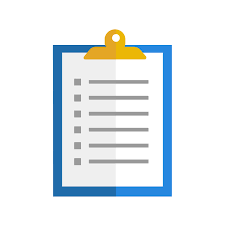

In [28]:

class_hauteurs = [1.53, True , 1.43, 1.56, 'the']
type(class_hauteurs)

list

In [30]:
print(class_hauteurs)

[1.53, True, 1.43, 1.56, 'the']


La liste peut comprendre différents types de python.

In [31]:
random = ['the day', 5, 5.235, True]
type(random)

list

L'ajout de listes est différent de celui des fliats ou des entiers.

In [32]:
print(random)
print(class_hauteurs)
random + class_hauteurs

['the day', 5, 5.235, True]
[1.53, True, 1.43, 1.56, 'the']


['the day', 5, 5.235, True, 1.53, True, 1.43, 1.56, 'the']

Cependant, la soustraction des listes n'est pas supportée.

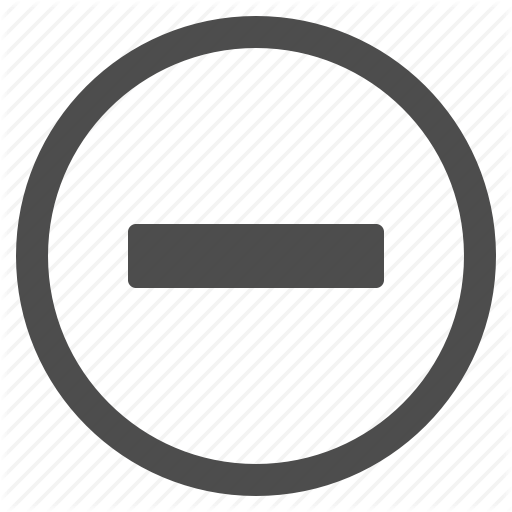

In [84]:
random==class_hauteurs

False

In [34]:
random==

['the day',
 5,
 5.235,
 True,
 'the day',
 5,
 5.235,
 True,
 'the day',
 5,
 5.235,
 True]

## Différents types ont des propriétés différentes.
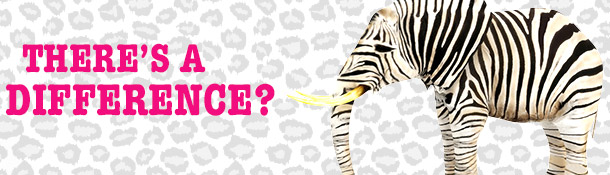

### Sélection de listes

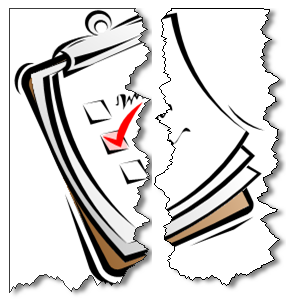

Il y a deux aspects importants des selection dans les listes:

#### 1) L'indice commence à zéro.

In [37]:
lista = ['chat', '3', 67, 4.56]
          # [0]   [1]  [2]  [3]
    
lista[3]

4.56

#### Plusieurs observations

Pour sélectionner plusieurs observations, vous définissez le début et la fin du découpage par un deux-points.

In [47]:


list_a[:3]

['chat', '3', 67]

Notez que List_a[3] n'est pas inclus dans la list

In [46]:
list_a[3:]

[4.56]

### Modification des listes

In [56]:
# note: dfkja;dlkfjd;f jl;sdfj ;slkfj;efgef
list_a[0] = "drew's"
print('thin')

thin


### Numpy

Numpy est un paquetage python qui facilite les calculs.

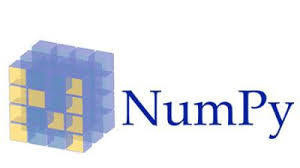

In [59]:
height = (1,2,3,4,5)
type(height)

tuple

In [57]:
import numpy as np

Voici les listes que nous avons générées plus tôt.

In [87]:
hauteur = [1.5, 1.67, 1.78, 1.86, 1.67]
poids =   [60,  84,   65,     70,    5]

  #       [0]   [1]   [2]    [3]    [4]

Si nous essayons de mesurer l'IMC à partir de ces listes, nous obtenons une erreur.

Équation:
IMC = kilogrammes / (mètres carrés)

In [67]:
IMC = poids / (hauteur ** 2)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

Cette tentative est infructueuse.
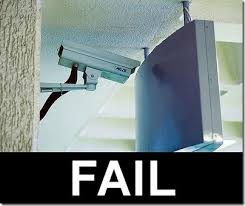

Pour générer ces calculs, nous devrons identifier l'index pour chaque observation. Voir ci-dessous.


In [68]:
IMC_0 = poids[0] / (hauteur[0] ** 2)
print(IMC_0)

26.666666666666668


Bien que cela soit suffisant pour une observation, au fur et à mesure que nous augmentons le nombre, ce processus devient fastidieux.

### Numpy

Les tableaux Numpy effectuent l'analyse ci-dessus avec une plus grande vitesse.
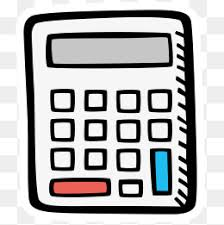

In [88]:
np_height = np.array(hauteur)
np_weight = np.array(poids)

In [89]:
np_weight

array([60, 84, 65, 70,  5])

In [79]:
IMC = np_weight /(np_height**2)
print(IMC)

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [90]:
np_height==np_weight

array([False, False, False, False, False])

Les 'arrays' ci-dessus représentent des 'arrays' numériques unidimensionnels. Cependant, les 'arrays' numériques peuvent également être bidimensionnels.

In [91]:
array2d = np.array([hauteur, poids])
print(array2d)

[[ 1.5   1.67  1.78  1.86  1.67]
 [60.   84.   65.   70.    5.  ]]


Comment procéderiez-vous en sélectionnant 1.5 à partir de la première rangée de la première colonne?

In [105]:
[str(array2d[0][0])+'the end of the dat']*4

['1.5the end of the dat',
 '1.5the end of the dat',
 '1.5the end of the dat',
 '1.5the end of the dat']

Pour sélectionner dans la rangée, une deuxième parenthèse est nécessaire.

In [106]:
array2d[1][0]

60.0

## Missing obs

how to deal with missing values. 

In [108]:
missings = np.array([1,2,3,4,np.nan])

In [112]:
print(missings)
hauteur

[ 1.  2.  3.  4. nan]


[1.5, 1.67, 1.78, 1.86, 1.67]

## Dictionnaires

Alors que les 'arrays' numpy bidimensionnels peuvent contenir plusieurs variables (telles que la taille et le poids), ils ne fournissent pas un moyen simple d'accéder aux données.

Les dictionnaires permettent au chercheur de donner des noms aux différentes parties du array.

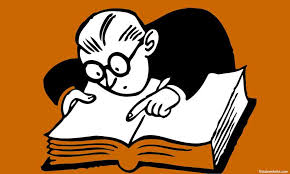

In [126]:
Dictionnaire = {'height': np.array([1,2,4]),
                'weight': np.array([4,5,6]),
            'string' : [lista, 'or', 'numpy array'] , 
             'diff': ['list', 'or', 'numpy array'] }

In [118]:
print(Dictionnaire['string'][1])

or


In [123]:
Dictionnaire['string']+Dictionnaire['diff']

[['chat', '3', 67, 4.56], 'or', 'numpy array', 'list', 'or', 'numpy array']

In [125]:
Dictionnaire['string']*2

[['chat', '3', 67, 4.56],
 'or',
 'numpy array',
 ['chat', '3', 67, 4.56],
 'or',
 'numpy array']

In [127]:
(Dictionnaire['weight']*Dictionnaire['height'])/3

array([1.33333333, 3.33333333, 8.        ])

Par exemple, nous pouvons placer les listes de tailles et de poids que nous avons générées auparavant dans un dictionnaire. 

In [ ]:
IMC_data = {'hauteur': hauteur, 
           'poids': np_p}

In [ ]:
print(IMC_data)

Nous pouvons accéder à une liste particulière ou à un tableau numpy en faisant référence à la clé.

Par exemple pour accéder à la liste des hauteurs, on tape IMC_data ['hauteur']

In [ ]:
IMC_data['hauteur']

Basé sur notre travail précédent avec des tableaux numériques, comment accéderiez-vous à la première observation de la liste de hauteur (1.5)?

In [ ]:
IMC_data['hauteur'][0]

Qu'en est-il des trois premières observations?

In [ ]:
IMC_data['hauteur'][0:3]

## Pandas DataFrames

Pandas est la bibliothèque Python pour l'analyse de données. Les DataFrames ont des étiquettes significatives, des fonctionnalités de séries temporelles et des processus de gestion pour les données manquantes et les opérations relationnelles (>, <, = etc).

Nous allons d'abord créer un fichier DataFrame pandas à partir du dictionnaire bmi_data avant d'apprendre à générer des dictionnaires Pandas à partir de fichiers csv, excel et stata.

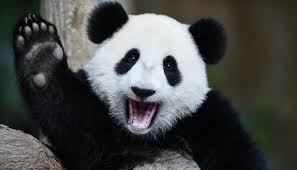

In [ ]:
import pandas as pd

Transformez le dictionnaire en un DataFrame Pandas en le plaçant dans la fonction ci-dessous.

In [ ]:
df = pd.DataFrame(IMC_data) 

In [ ]:
df

GÉNIAL! Maintenant, nous avons un cadre de données pandas de hauteur et de poids qui peut être facilement interprété.

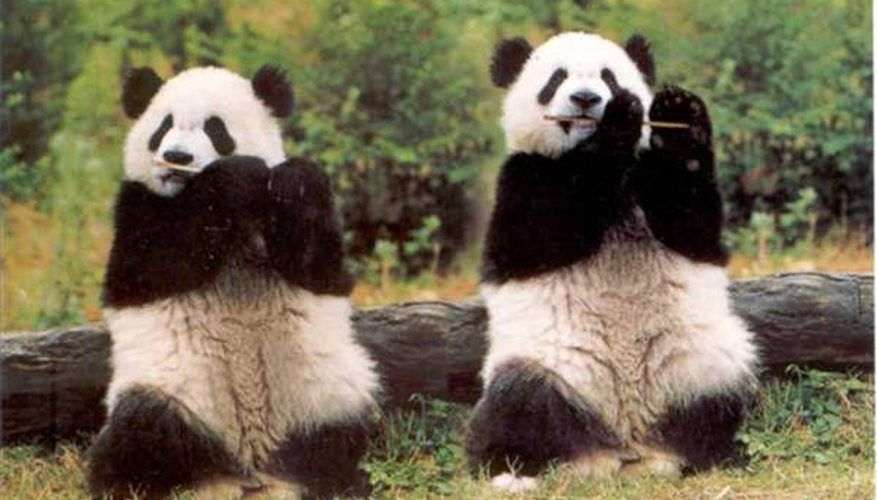

In [ ]:
noms = ['Fatima', 'Ahmadou', 'Michael', 'Frank', 'Gretta']

In [ ]:
df['noms'] = noms 

In [ ]:
df

In [ ]:
df

In [ ]:
df.set_index('noms', inplace=True)
df

Maintenant que nous avons un ensemble de données propre, essayons d'identifier des colonnes et des observations spécifiques.

Quelle est la hauteur d'Ahmadou?

In [ ]:
df['hauteur']

In [ ]:
fiche = '/media/lightner/TOSHIBA EXT/Citing_Africa/Reading List/Data/reading_list_020218.xlsx'

In [ ]:
data = pd.read_excel(fiche)

In [ ]:
data

In [ ]:
df['hauteur']['Ahmadou':'Frank']

## Obtenir de la data de la Banque mondiale

Python peut vous aidez à trouver de la data ! Dans cet exemple, nous utiliserons le package wbdata pour collecter des données à partir des indicateurs de développement de la Banque mondiale.
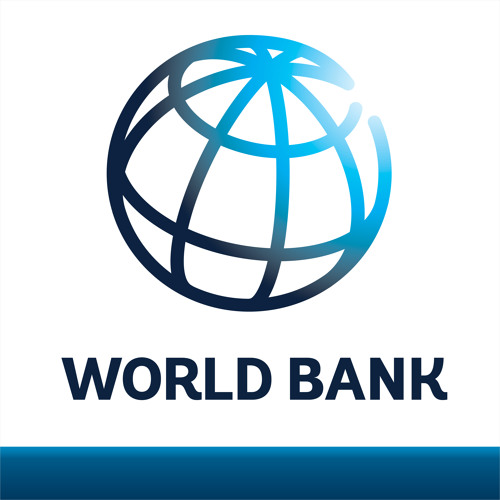


In [ ]:
import wbdata

In [ ]:
wbdata.get_source()

C’est beaucoup de data. On peut choisir de sélectionner quelques des indicateurs de développement africain. 

Le code ci-dessous fournit les noms et les codes de plusieurs indicateurs de développement. 

In [ ]:
wbdata.get_indicator(source=11)

#### Quels indicateurs voulons-nous?

J'ai trouvé une étude qui examine la relation entre le PIB par habitant, les versements d’argent de l’étranger et l'investissement privé. Je pensais que nous pourrions le recréer en utilisant les indicateurs de développement africains.

Premièrement il faut créer un dictionnaire de codes d'indicateurs et leurs noms respectifs.


In [ ]:
indicators_dict = {'NY.GDP.PCAP.PP.KD': 'GDP Per Capita (Constant 2011 USD)', 
                  'BX.TRF.PWKR.DT.GD.ZS': 'Personal remittances, received (% of GDP)', 
                  'BX.KLT.DINV.WD.GD.ZS': 'Foreign direct investment, net inflows (% of GDP)', 
                  'GB.XPD.RSDV.GD.ZS' : 'Research and development expenditure (% of GDP)', 
                  'FS.AST.PRVT.GD.ZS' : 'Domestic credit to private sector (% of GDP)'}


### Veuillez télécharger seulement trois ou quatre choix de pays.

### On va choisir les pays à revenu intermédiaire-inférieur

Nous voulons examiner les pays qui répondent à cette catégorie.

In [ ]:
# Ne vous inquiétez pas si ce code n'a pas de sens (je ne l'ai pas écrit non plus.)
# Je l'ai eu sur internet!
LMC_countries = [i['id'] for i in wbdata.get_country(incomelevel="LMC", display=False)]

In [ ]:
print(LMC_countries)

Choisissez trois ou quatre d'en haut et placez dans la liste.

In [ ]:
LMC_countries = ['List of Country Codes']

### Obtenir la data

Maintenant que nous avons défini les indicateurs et les pays que nous voulons examiner, nous pouvons prendre les données.

In [ ]:
# voyons que nous plaçons d'abord le dictionnaire des indicateurs, puis le pays = le nom de la liste.

df = wbdata.get_dataframe(indicators_dict, country=LMC_countries, convert_date=False)

### Maintenant, Il faut patienter un peu !

En fonction de la vitesse d’Internet, cela peut prendre un peu de temps. 

### Voilà la Data !!!

In [ ]:
df

### Rechercher les codes pays du pays d'intérêt

Dans certains cas, nous pouvons simplement vouloir avoir une variable pour un seul pays.

Par exemple le code pour la Côte d'Ivoire est CIV.

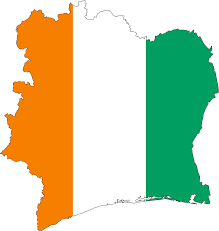

In [ ]:
wbdata.search_countries("ivoire")

Ensuite, nous incluons l'indicateur et le pays de choix dans la fonction get_dataframe ().

In [ ]:
df_CIV = wbdata.get_dataframe({'NY.GDP.PCAP.PP.KD': 'PIB par habitant (Constant 2011 USD)'}, country='CIV', convert_date=False)

Voila! Nous avons un ensemble de données avec le PIB par habitant de la Côte d'Ivoire de 1965 à 2016. (Lorsque les données sont disponibles).

In [ ]:
df_CIV.describe()

## Pandas: Exploration de données, nettoyage et statistiques récapitulatives

Nous explorons maintenant le dataframe Lower Middle Income. Premièrement, nous utiliserons les fonctions intégrées des pandas pour des statistiques et des analyses sommaires. Ensuite, nous utiliserons l'outil de visualisation Holoviews pour explorer les données à travers des graphiques et des tableaux.

##### DataFrame.columns

Une question initiale pour une recherche peut être: quelles variables sont dans mon ensemble de données? Utilisez df.columns pour lister les noms des colonnes de df.

In [ ]:
df.columns

##### Head() and Tail()
L'une des premières tâches consiste à examiner le début et la fin de l'ensemble de données pour s'assurer que les données semblent raisonnables.

In [ ]:
# Choisissez les cinq premières observations
df.head()

In [ ]:
# Choisissez les cinq derniers observations 
df.tail()

#### Extraire l'index - Générer une variable

Dans certains cas, il est utile de transformer l'index en colonnes régulières. Par exemple, vous pouvez vouloir les utiliser dans une régression.

##### dataframe.reset_index()  

In [ ]:
df.reset_index(inplace=True)

#### Modifier les noms des variables

Cependant, «pays» et «date» ne sont pas des noms particulièrement intéressants pour les variables. Nous pourrions vouloir changer leur nom en 'Pays' et 'Année'.

In [ ]:
df.rename(index=str, columns={"country": "Country", "date": "Year"}, inplace=True)

In [ ]:
df.head()

Bien que l'examen visuel des données puisse être utile dans un premier temps, lorsque vous travaillez avec des centaines ou des milliers d'observations, l'analyse des données de cette manière est inadéquate.

#### DataFrame.describe ()

DataFrame.describe () offre un moyen rapide d'obtenir des statistiques récapitulatives sur toutes les colonnes. Ce code donne le nombre d'observations (non manquantes), la moyenne, l'écart-type, le minimum, le 25e centile, le 50e centile, le 75e centile et les valeurs maximales.

Comme indiqué, la variable sur les dépenses de recherche et développement a de nombreuses valeurs manquantes; seulement 302 observations. Nous constatons également que le revenu moyen dans notre échantillon de pays est d'environ 4 mille dollars (2011). 

In [ ]:
df.describe()

### Filtrage Pandas DataFrames

Dans de nombreux cas, nous n'avons pas besoin de toutes les données dans la base de données. Par exemple, nous pouvons considérer les pays dont le revenu par habitant est supérieur à 8 000 dollars comme trop riches pour notre étude. Dans ce cas, nous voudrions sélectionner tous ceux qui enregistrent moins que cette valeur.

In [ ]:
# Sélectionne le pays avec moins de 8 000 PIB par habitant.
# Notez que dans df [df []> valeur], nous nous référons à l'ensemble de données à l'intérieur et à l'extérieur de []

df_under8 = df[df['GDP Per Capita (Constant 2011 USD)']<8000]

Si nous lançons df_under8.describe (), nous verrons que la valeur maximale du PIB par habitant est maintenant inférieure à 8000.

Il convient également de noter que df_under8 est un nouvel ensemble de données. Si nous revenons à df, il sera inchangé.

In [ ]:
df_under8.describe()

## Visualisation avec Holoviews

L'un des avantages de travailler en Python est ses capacités au-delà des calculs de base. En fait, Python peut générer des visuels interactifs magnifiques et pratiques avec très peu d'effort.

Holoviews est un paquet python qui génère des visuels interactifs dans le cahier jupyter.

In [ ]:
# Import Holoviews 
import holoviews as hv

# Choisissez bokeh comme extension
hv.extension('bokeh')

# si le symbole de holoviews avec bokeh apparaît, l'importation a été réussie

#### Options de base

La première section crée la fenêtre de sortie et modifie la mise en forme des visuels. Explorez en faisant de petits changements au format.

In [ ]:
# Choisissez la taille de sortie pour les graphiques
%output size=200

### Scatter Plot

Une manière typique d'explorer les données dans les étapes initiales est à travers un diagramme de dispersion. Ceci trace la relation entre deux variables.

Par exemple, dans la session ci-dessous, nous examinons la relation entre le crédit intérieur au secteur privé (% du PIB) et le PIB par habitant (USD constant 2011).

Comme la théorie économique le suggère, il semble y avoir une relation positive.

In [ ]:
%%opts Scatter [width=250, hauteur=250, tools=['hover']] (size=5)
                 
scatter1 = hv.Scatter(df, 
                      kdims= ['GDP Per Capita (Constant 2011 USD)'],
                      vdims = ['Domestic credit to private sector (% of GDP)', 'Year', 'Country'])
scatter1

### Scater - Examiner les changements au fil du temps

Bien qu'il y ait une relation positive dans le visuel ci-dessous, cela peut conduire à la fois une hausse en même temps.

Laissez examiner ceci en voyant comment l'intrigue change comme nous regardons une année à la fois.

In [ ]:
%%opts Scatter [show_grid=True, width=250, hauteur=250, tools=['hover']] (size=10)

scatter2 = hv.Scatter(df, 
                      kdims= ['GDP Per Capita (Constant 2011 USD)'],
                      vdims = ['Domestic credit to private sector (% of GDP)', 'Year', 'Country']).groupby(['Year'])


# Take a look
scatter2

### Histogramme

Pour examiner la variance ou la distribution d'une variable donnée, il peut être utile de tracer un histogramme de la courbe. Holoviews rend cette tâche très simple.

In [ ]:
df_hist = df['GDP Per Capita (Constant 2011 USD)']
df_hist = df_hist.dropna().as_matrix()
frequencies, edges = np.histogram(df_hist, 20)
hv.Histogram(frequencies, edges)

## Graphique en ligne

Pour examiner les données de l'année, les graphiques linéaires sont utiles pour voir les paternels au fil du temps.

Ci-dessous, j'examine les variations du PIB par habitant des heures supplémentaires pour la Côte d'Ivoire. Modifiez les noms des variables et la sélection du pays pour modifier l'intrigue. 

In [ ]:
%%opts Curve {+framewise}

points = [(df['Year']["Cote d'Ivoire"][str(i)], df['GDP Per Capita (Constant 2011 USD)']["Cote d'Ivoire"][str(i)]) for i in range(1960,2017)]

hv.Curve(points)

### Bokeh Graphique en courbes

Je trouve les cartes bokeh légèrement plus attrayantes. Cependant, ils utilisent un peu plus de code. Voici un exemple:

Pour des intrigues interactives plus intéressantes, utilisez le tutoriel de jupyter séparé de bokeh tutorial

In [ ]:
from bokeh.plotting import figure, output_file, show

output_file("line.html")

p = figure(plot_width=400, plot_hauteur=400, tools='hover')

# add a line renderer
p.line(df['Year']["Cote d'Ivoire"], df['GDP Per Capita (Constant 2011 USD)']["Cote d'Ivoire"] , line_width=2)

show(p)

# Econométrie avec Python

Nous avons appris certaines des bases de python et comment les paquets python peuvent être utilisés pour stocker, accéder, nettoyer, résumer et visualiser des données. Maintenant, nous allons examiner comment effectuer une analyse économétrique avec Python. 

## Statsmodels

Bien qu'il y ait quelques paquets pour l'économétrie pour python, nous allons travailler avec statsmodels.

Statsmodels est un package avec des fonctions spécifiques pour l'économétrie telles que la correction, la régression et l'analyse de séries chronologiques.

De plus, statsmodels génère un moyen pratique de publier des résultats de régression via Latex.

In [ ]:
# Import statsmodels comme sm
import statsmodels.api as sm 

##### # Ajouter un terme constant à l'ensemble de données

In [ ]:
# Ajouter un terme constant à l'ensemble de données
df['Constant'] = 1

#### Liste des variables indépendantes dans les régressions

Chaque Xvars _ '#' représente un ensemble de variables indépendantes dans une régression.

In [ ]:
# Create lists of variables to be used in the first regression
Xvars_1 = ['Domestic credit to private sector (% of GDP)', 'Constant']
# Create lists of variables to be used in the second regression
Xvars_2 = ['Domestic credit to private sector (% of GDP)', 'Foreign direct investment, net inflows (% of GDP)', 'Constant']
# Create lists of variables to be used in the third regression
Xvars_3 = ['Domestic credit to private sector (% of GDP)', 'Foreign direct investment, net inflows (% of GDP)', 'Personal remittances, received (% of GDP)', 'Constant']

#### Exécuter la régression et enregistrer les valeurs ajustées

In [ ]:
# Estimate an OLS regression for each set of variables
# First Regression
# order = (dependent variable, independent variables, missing='drop')
reg1 = sm.OLS(df['GDP Per Capita (Constant 2011 USD)'], df[Xvars_1], missing='drop').fit()
print('Results from Regression 1')
print(reg1.summary())


# Second Regression 
reg2 = sm.OLS(df['GDP Per Capita (Constant 2011 USD)'], df[Xvars_2], missing='drop').fit()
print()
print('Results from Regression 2')
print(reg2.summary())


# Third Regression
reg3 = sm.OLS(df['GDP Per Capita (Constant 2011 USD)'], df[Xvars_3], missing='drop').fit()
print()
print('Results from Regression 3')
print(reg3.summary())

### Exporter les résultats dans un format attrayant

In [ ]:
from statsmodels.iolib.summary2 import summary_col

info_dict={'R-squared' : lambda x: "{:.2f}".format(x.rsquared),
           'No. observations' : lambda x: "{0:d}".format(int(x.nobs))}

results_table = summary_col(results=[reg1,reg2,reg3],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Priv Cred',
                                         'Add FDI',
                                         'Add Remit'],
                            info_dict=info_dict,
                            regressor_order=['Domestic credit to private sector (% of GDP)', 'Foreign direct investment, net inflows (% of GDP)', 'Personal remittances, received (% of GDP)', 'Constant'])

results_table.add_title('Example - OLS Regression in Python')

print(results_table)


### Générer du code Latex pour une présentation attrayante

Malheureusement, j'ai dû apporter quelques modifications au Code Latex présenté ci-dessous. Cependant, les changements étaient petits.

- Effacer le \\
- Effacer le début {center} et la fin {center}
- Débarrassez-vous du premier début / fin {tabulaire} et placez les en-têtes dans la deuxième tabulaire {}

Si l'utilisateur ne souhaite publier que la table, placez le texte entre le code suivant:

    \documentclass[paper=a4, fontsize=11pt]{scrartcl} % A4 paper and 11pt font size

    \begin{document}
    
    ...
    
    \end{document}

In [ ]:
a = results_table.as_latex()
print(a)

### Résultat de la table Latex

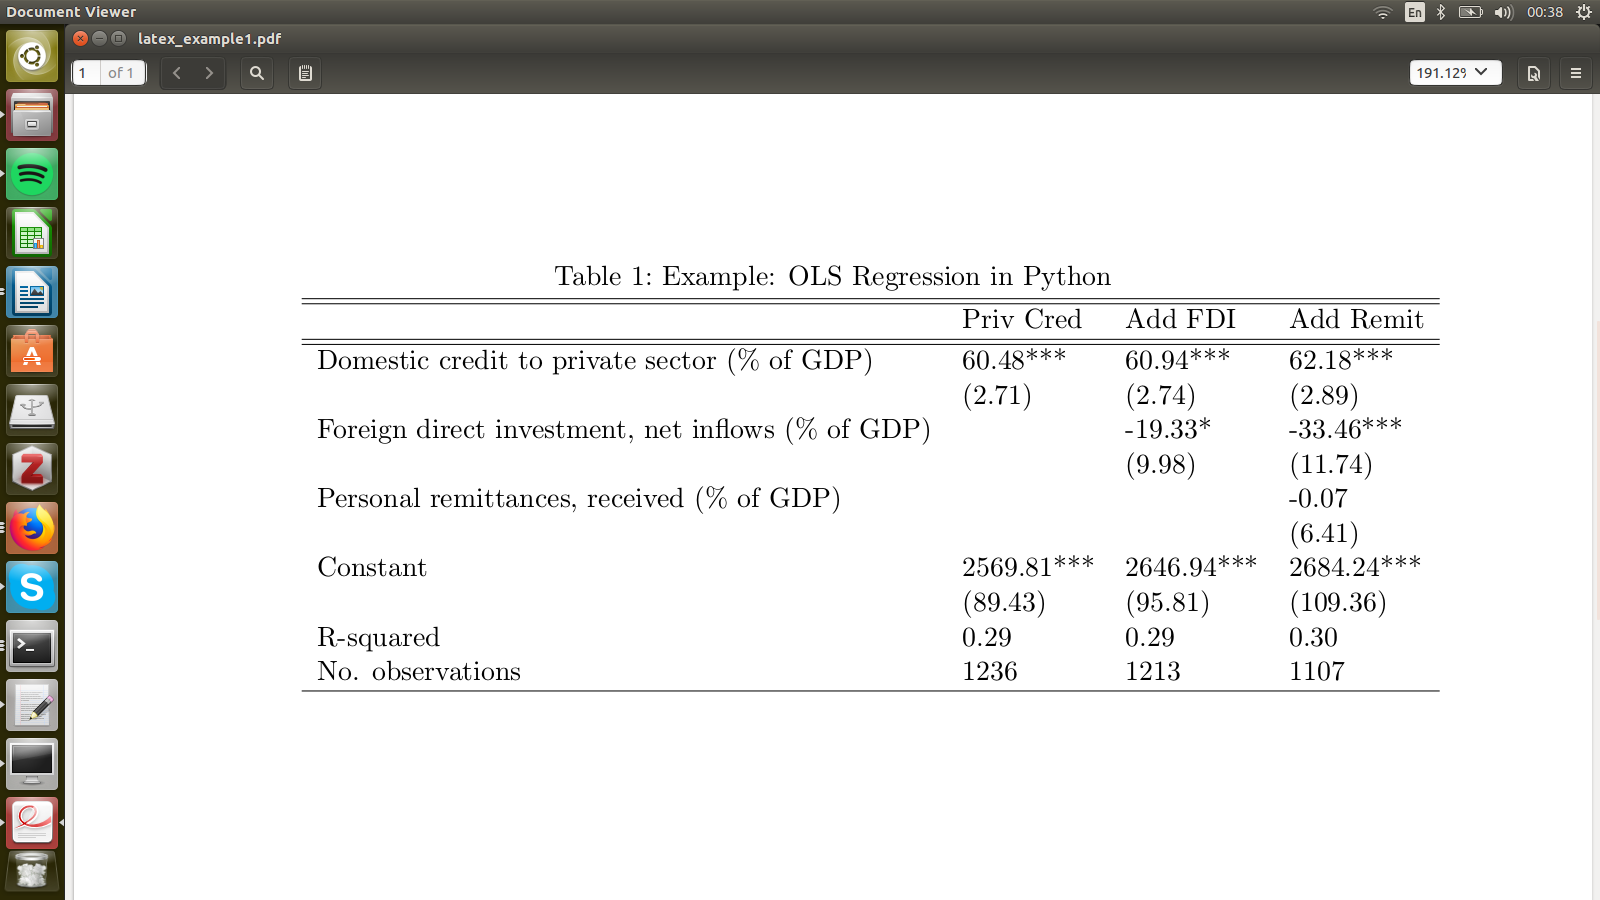

### Introduction des variables retardées

Voir les résultats de Régression 1 ci-dessous. Contrairement à ce que suggère la théorie économique traditionnelle, les effets de l'IDE sur le PIB ne sont pas statistiquement significatifs.

Cependant, plusieurs contraintes à cette régression peuvent expliquer ces résultats. Par exemple, l'investissement direct étranger ne fournit probablement pas de rendements avant une période ultérieure. Ainsi, l'IDE de l'année dernière ou de l'année précédente pourrait être un meilleur indicateur du PIB par habitant.

###### dataframe ['column']. shift ()

Pandas propose une méthode simple pour générer des variables retardées: .shift ()

Dans cet exemple, nous voulons retarder l'IDE d'un an (ou l'observation du temps). Ainsi,

In [ ]:
# Génère une variable d'IDE dans l'année précédente
df['FDI_lagged'] = df['Foreign direct investment, net inflows (% of GDP)'].shift(-1)

Maintenant, si nous examinons le tableau ci-dessous, nous verrons que la valeur de FDI_lagged est la même que l'investissement direct étranger, les entrées nettes (% du PIB) un an auparavant.

In [ ]:
df

## Méthodes d'effets mixtes

Le code suivant exécute un modèle à effet fixe / mixte sur un an. La première régression mesure l'effet des lignes de tendance dans tous les pays au cours d'une année donnée. La seconde présente uniquement les effets fixes pays. Cela permet de contrôler tous les aspects d'un pays qui sont constants dans le temps, tels que le climat. La troisième régression comprend les effets mixtes de l'année et du pays pour un modèle de différence dans la différence.

In [ ]:
# import additional package for fixed effects
import statsmodels.formula.api as smf


Malheureusement, le code pour les modèles à effets mixtes est légèrement plus compliqué. Tout d'abord, l'entrée de régression est une chaîne avec le format suivant:

'DependentVar ~ IndependentVar + IndependentVar ...'

où les noms de variables ne peuvent pas avoir d'espaces en leur sein.

Ainsi, notre première étape consiste à renommer toutes les variables de l'ensemble de données pour effacer tous les espaces.

In [ ]:
# Rename all columnns 
# Make sure to pay attention to the order of the names!
df.columns = ['Country', 'Year', 'creditprive', 'FDI', 'GDPpc', 'Remitt', 'ResDev', 'Constant', 'FDI_lagged']

La régression ne semble pas non plus gérer correctement les valeurs manquantes. Par conséquent, nous devons générer différents ensembles de données pour chaque régression et supprimer les valeurs manquantes.

In [ ]:
# Regression 1 
dfreg1= df[['Year', 'FDI_lagged', 'GDPpc', 'Constant', 'Country']]
dfreg1 = dfreg1.dropna()

#### Concevoir le modèle

Maintenant, nos données sont prêtes pour l'analyse avec les effets mixtes du pays.

Nous devons d'abord choisir notre modèle. Dans ce premier modèle, nous examinons les effets de l'IDE décalé en pourcentage du PIB sur le PIB par habitant. En incluant les pays mixtes, nous contrôlons toutes les caractéristiques des pays qui sont constantes dans le temps. Nous examinons donc la relation entre les variations de l'IDE à l'intérieur des pays et les variations correspondantes du PIB l'année suivante.

In [ ]:
model = 'GDPpc ~ FDI_lagged'

##### Insérer un modèle dans la régression - Inclure les contrôles pays à effet mixte

Comme le suggère la théorie économique, une augmentation des IDE (en pourcentage du PIB) entraîne une augmentation du PIB l'année suivante. Dans ce modèle, une variation d'un pour cent de l'IDE en pourcentage du PIB correspond à une augmentation du PIB par habitant l'année suivante de 46,7 dollars US de 2011.

Cependant, nous pouvons nous inquiéter que tous les pays aient enregistré une augmentation du PIB par habitant et de l'IDE en raison d'un troisième facteur, comme les nouvelles technologies ou les réformes du secteur bancaire. Cette hypothèse est soutenue par le diagramme de dispersion que nous avons généré plus tôt, qui examine les changements dans le temps. Dans le nuage de points, au fur et à mesure des années, l'IDE et le PIB par habitant ont tous deux augmenté. Nous pouvons contrôler cette tendance en utilisant des effets mixtes en incluant des variables muettes de l'année (pour tous sauf un).


In [ ]:
# insérer le modèle et les types de données dans l'équation de régression
# insère les effets mixtes de l'année en définissant des groupes égaux à la zone de données ['Pays'].mixed_reg1 = smf.mixedlm(model, dfreg1 , groups=dfreg1['Country'], missing='drop').fit()
print('Results from Regression 1')
print(mixed_reg1.summary())

### Générer des nuls d'année

Premièrement, nous devons générer les variables binaires de l'année. La boucle suivante les génère efficacement. Ce code génère des variables binaires d'année et une chaîne de noms de variables binaires à ajouter à la régression.

In [ ]:
import numpy as np

years = ""
ystr = []
# For Each year in the dataset, create a dummy variable which equals 1 if the year == i 
for i in range(min(dfreg1["Year"].astype(int)), max(dfreg1["Year"].astype(int))) :
    dfreg1['y'+str(i)] = np.where(dfreg1['Year']==str(i), 1, 0)
    years = years + '+ y'+str(i)+' '
    ystr = ystr + list(['y'+str(i)])

Si nous imprimons l'ensemble de données pour la régression, nous devrions observer des variables qui prennent la valeur '1' lorsque la variable binaire de l'année correspond à l'année de l'observation.

In [ ]:
dfreg1

### Définir le modèle avec les variables binaires de l'année

Nous redéfinissons maintenant notre modèle incluant les variables binaires de l'année.

In [ ]:
model = 'GDPpc ~ FDI_lagged' + years
print(model)

#### Exécuter le nouveau modèle

En incluant les variables nominales de l'année, le coefficient d'IDE décalé s'accélère en fonction de la variation des variations de l'investissement direct étranger, variant selon le pays et en fonction du pays. En incluant les contrôles de l'année, l'effet de l'IDE retardé sur la croissance du PIB est réduit. Cependant, les résultats restent statistiquement significatifs au niveau de 99%.

Interprétation: Une augmentation de la déviation standard de l'investissement étranger direct (% du PIB) dans un pays correspond à une augmentation du PIB par habitant de plus de 50 dollars (USD constant 2011) dans ce pays, en moyenne.

In [ ]:
# insérer le modèle et les types de données dans l'équation de régression
# insert Mixte d'effets d'années en définissant des groupes égaux à l'élément de données ['Pays']
mixed_reg2 = smf.mixedlm(model, dfreg1 , groups=dfreg1['Country'], missing='drop').fit()
print('Results from Regression 1')
print(mixed_reg2.summary())

In [ ]:
dfreg1['FDI_lagged'].describe()